In [1]:
import numpy as np
import h5py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(self.time-skipTime,self.spikeID,color='black',s=1)

NameError: name 'self' is not defined

In [2]:
with h5py.File('Snudda/networks/tinySim/network-neuron-positions.hdf5', 'r') as hdf5:
    base_items = list(hdf5.items())
    print("Items on root :", base_items)
    meta = hdf5.get('meta')
    meta_items = list(meta.items())
    print("Items on meta :", meta_items)
    network = hdf5.get('network')
    network_items = list(network.items())
    print("Items on network :", network_items)
    neurons = network.get('neurons')
    neurons_items = list(neurons.items())
    print("Items on neurons :", neurons_items)
    neuronID = np.array(neurons.get('neuronID'))
    neuron_type = np.array(neurons.get('morphology'))

Items on root : [('meta', <HDF5 group "/meta" (2 members)>), ('network', <HDF5 group "/network" (1 members)>)]
Items on meta : [('config', <HDF5 dataset "config": shape (), type "|O">), ('configFile', <HDF5 dataset "configFile": shape (), type "|O">)]
Items on network : [('neurons', <HDF5 group "/network/neurons" (19 members)>)]
Items on neurons : [('axonDensity', <HDF5 dataset "axonDensity": shape (99,), type "|S245">), ('axonDensityBoundsXYZ', <HDF5 dataset "axonDensityBoundsXYZ": shape (99, 6), type "<f8">), ('axonDensityRadius', <HDF5 dataset "axonDensityRadius": shape (99,), type "<f8">), ('axonDensityType', <HDF5 dataset "axonDensityType": shape (99,), type "|S3">), ('channelID', <HDF5 dataset "channelID": shape (99,), type "<i8">), ('channelMethod', <HDF5 dataset "channelMethod": shape (), type "|O">), ('hoc', <HDF5 dataset "hoc": shape (99,), type "|S10">), ('maxAxonRadius', <HDF5 dataset "maxAxonRadius": shape (99,), type "<f8">), ('maxDendRadius', <HDF5 dataset "maxDendRadius

In [3]:
neuron_type2 = []

for i in range (0, neuron_type.size) :
    neuron_type2.append(str(neuron_type[i]))
    
print(type(neuron_type2[0]))

for i in range (0, len(neuron_type2)):
    if "dspn" in neuron_type2[i]:
        neuron_type2[i] = "dspn"
    elif ('ispn' in neuron_type2[i]) :
        neuron_type2[i] = "ispn"
    elif 'lts' in neuron_type2[i] :
        neuron_type2[i] = "lts"
    elif 'fs' in neuron_type2[i] :
        neuron_type2[i] = "fs"
    elif 'chin' in neuron_type2[i] :
        neuron_type2[i] = "chin"
print(neuron_type2)



<class 'str'>
['dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'ispn', 'ispn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'ispn', 'ispn', 'ispn', 'dspn', 'ispn', 'fs', 'ispn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'ispn', 'dspn', 'dspn', 'ispn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'ispn', 'chin', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'ispn', 'ispn', 'lts', 'ispn', 'dspn', 'ispn', 'dspn', 'dspn', 'dspn', 'ispn', 'dspn', 'dspn', 'dspn', 'dspn']


    neuronID neuron_type
0          0        dspn
1          1        ispn
2          2        dspn
3          3        dspn
4          4        ispn
..       ...         ...
94        94        ispn
95        95        dspn
96        96        dspn
97        97        dspn
98        98        dspn

[99 rows x 2 columns]


<AxesSubplot:ylabel='neuron_type'>

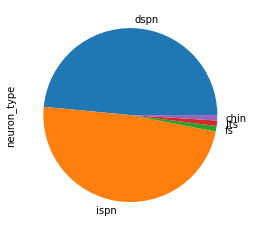

In [4]:


d = {'neuronID': neuronID, 'neuron_type': neuron_type2}
df = pd.DataFrame(data=d)
print(df)
df['neuron_type'].value_counts().plot(kind='pie')


In [5]:
with h5py.File('Snudda/networks/tinySim/network-pruned-synapses.hdf5', 'r') as file:
    network = file.get('network')
    synapses = network.get('synapses')
    neurons = network.get('neurons')
    neuronID = np.array(neurons.get('neuronID'))
    morphology = np.array(neurons.get('morphology'))
    
    syn_table = []
    for i in range(0,len(synapses)):
        syn_table.append(synapses[i])

    df2 = pd.DataFrame(data=syn_table)
    df2.columns = ['sourceID', 'destinID', '3', '4', '5', 'synapseType', '7', 'dentDistance', '9', '10', '11', '12', '13']
    print(df2)    

      sourceID  destinID    3    4    5  synapseType   7  dentDistance    9  \
0            3         0   75  136  199            6  14           240  143   
1            3         0   91  132  211            7  14           260  107   
2            3         0  111  136  185           26  14           192   40   
3            6         0  117  116  178           26  14           366  115   
4            6         0  128  118  167           26  14           289  130   
...        ...       ...  ...  ...  ...          ...  ..           ...  ...   
7029        89        98  142  104  186           26  14           223   92   
7030        89        98  159  135  187           26  14           312   53   
7031        92        98  135   94  176           21  14           239  136   
7032        92        98  135   98  177           21  14           149  120   
7033        92        98  136   98  177           21  14           156  122   

      10   11   12      13  
0      5  960  191  55

In [6]:
neuron_type = []

for i in range (0, morphology.size) :
    neuron_type.append(str(morphology[i]))

#maybe this loop can be erased, if it is going to make the process lengthy (finding and replacing every neuron).
#we can leave the neuron_type as is, with the long doc path, and just change the name at the end, for printing
for i in range (0, len(neuron_type)):
    if "dspn" in neuron_type[i]:
        neuron_type[i] = "DSPN"
    elif ('ispn' in neuron_type[i]) :
        neuron_type[i] = "ISPN"
    elif 'lts' in neuron_type[i] :
        neuron_type[i] = "LTS"
    elif 'fs' in neuron_type[i] :
        neuron_type[i] = "FS"
    elif 'chin' in neuron_type[i] :
        neuron_type[i] = "ChIN"
            
structure_df = {'neuronID': neuronID, 'neuron_type': neuron_type}
df = pd.DataFrame(data=structure_df)


In [ ]:
#dsp_to_dsp = []
#print(df2['sourceID'])
#for row in df2:
#    if(row['sourceID'])

In [7]:
#net = df.get('network')
#.get('synapses')
print(df.info)
print(type(df))
df.info

<bound method DataFrame.info of     neuronID neuron_type
0          0        DSPN
1          1        ISPN
2          2        DSPN
3          3        DSPN
4          4        ISPN
..       ...         ...
94        94        ISPN
95        95        DSPN
96        96        DSPN
97        97        DSPN
98        98        DSPN

[99 rows x 2 columns]>
<class 'pandas.core.frame.DataFrame'>


<bound method DataFrame.info of     neuronID neuron_type
0          0        DSPN
1          1        ISPN
2          2        DSPN
3          3        DSPN
4          4        ISPN
..       ...         ...
94        94        ISPN
95        95        DSPN
96        96        DSPN
97        97        DSPN
98        98        DSPN

[99 rows x 2 columns]>

In [ ]:
type(df)

In [8]:
with open("Snudda/networks/tinySim/simulation/volt.txt", 'r') as volt_txt:
    volt = volt_txt.readlines()

time = np.array(volt[0].split(","),float)
volt = volt[1:]
volt_2 =[]
for i in range(0,len(volt)):
    volt_2.append(np.array(volt[i].split(","),float))
print(volt_2[0])

FileNotFoundError: [Errno 2] No such file or directory: 'Snudda/networks/tinySim/simulation/volt.txt'

In [ ]:
x =volt[0][0]
print(x)

In [ ]:
# Data for plotting
fig, ax = plt.subplots()
ax.plot(time[1:], volt_2[0][1:])

ax.set(xlabel='time (ms)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [ ]:
import matplotlib.pyplot as plt

import numpy as np

from numpy import genfromtxt
#genfromtxt('my_file.csv', delimiter=',')
 

# Set the random seed for data generation

np.random.seed(2)

 

# Create rows of random data with 50 data points simulating rows of spike trains

data = genfromtxt('02-Data Analysis/data/lgn/plain/neuron_06_stimulus_07.csv', delimiter=',')
z=0
i=0
j=0
for i in range(10):
    for j in range(4500):
        if(data[i,j] == 1):
            x1 = [i,i+0.5]
            x2 = [j,j]
            plt.plot(x2,x1,color = 'black')
        else:
            z= z+1
# # Provide the title for the spike raster plot
plt.title('raster plot Neuron-5-Stimulus-7')
# # Give x axis label for the spike raster plot
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test1png.png', dpi=100)
# # Give y axis label for the spike raster plot
plt.ylabel('trial')
# # Display the spike raster plot
plt.show()


In [ ]:
xspikes = [[0.2,0.5],[0.2,0.5],[0.2,0.5]]
yspikes = [[1,2],[1,2],[0,0]]

plt.plot(xspikes, yspikes)
plt.show()